# Nearest neighbor classification

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

//anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


We'll use a [leukemia](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html) gene expression data set in this notebook.  I combined the train/test partitions of this dataset into a single file.

In [2]:
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file("data/leu_all.data")
X.shape
#X = np.genfromtxt('MNIST/MNIST_train.csv', delimiter = ',')
#y = np.genfromtxt('MNIST/MNIST_train_labels.csv', delimiter = ',')
#X.shape

(72, 7129)

In [3]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
n_neighbors = 5
classifier = KNeighborsClassifier(n_neighbors, p=2, weights='uniform')
cv_results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(cv_results['test_score'])


0.83333333333333326

Text(0.5,0,'number of neighbors')

Text(0,0.5,'accuracy')

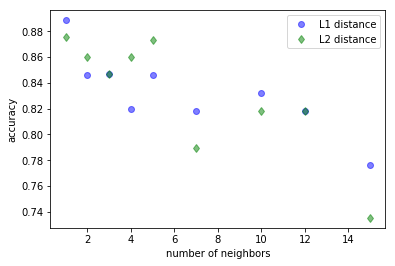

In [4]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
num_neighbors = [1,2,3,4,5,7,10,12,15]
accuracy_l1 = []
accuracy_l2 = []
for k in num_neighbors :
    classifier = KNeighborsClassifier(k, p=1, weights='uniform')
    cv_results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
    accuracy_l1.append(np.mean(cv_results['test_score']))
    classifier = KNeighborsClassifier(k, p=2, weights='uniform')
    cv_results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
    accuracy_l2.append(np.mean(cv_results['test_score']))
plt.plot(num_neighbors, accuracy_l1, 'ob', alpha=0.5, label='L1 distance')
plt.plot(num_neighbors, accuracy_l2, 'dg', alpha=0.5, label='L2 distance')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [5]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = cross_validate(SVC(kernel='linear'), X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
print(np.mean(results['test_score']))

0.973333333333


So, the SVM works a lot better than the nearest neighbor classifier.  Let's see if PCA will help the nearest neighbor classifier.

In [7]:
type(X)

scipy.sparse.csr.csr_matrix

In [8]:
X = X.todense()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

print (pca.explained_variance_ratio_)
X_reduced.shape

[ 0.22568728  0.11655105  0.05409513  0.03533554  0.03003318  0.02801815
  0.02467637  0.02206176  0.0191093   0.01810437  0.01618755  0.01578355
  0.01457776  0.01412232  0.01314588  0.01234478  0.0113869   0.01122882
  0.0099001   0.00957027]


(72, 20)

In [15]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
n_neighbors = 5
classifier = KNeighborsClassifier(n_neighbors, p=2, weights='uniform')
cv_results = cross_validate(classifier, X_reduced, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(cv_results['test_score'])


0.87523809523809537